In [1]:
from ase.io import Trajectory
import nglview
import numpy as np
#from moviepy.config import change_settings
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
import mpl_interactions.ipyplot as iplt
import os

#change_settings({"FFMPEG_BINARY": "/Users/ktrerayapiwat/Software/custom/ffmpeg"})
os.environ["FFMPEG_BINARY"] = "/Users/ktrerayapiwat/Software/custom/ffmpeg"
traj=[]
traj_full = Trajectory('./traj/md_0000_conc_0.250.traj', mode='r')
for atoms in traj_full[::]:
    #atoms.translate([atoms.cell[0,0]/2,2,0])
    #atoms.wrap()
    #traj.append(atoms[:2232]+atoms[2233:])
    traj.append(atoms)

view = nglview.show_asetraj(traj, gui=True, add_unitcell=True)
#view.frame=100/
view.camera = 'orthographic'
view._remote_call("setSize", target="Widget", args=['400px','400px'])
view.control.zoom(0.25)
view.clear_representations()
#view.add_ball_and_stick(radius=0.25, selection='_H or _Ni or _O')
view.add_ball_and_stick(radius=0.35, selection='_Ni or _H')
view.add_unitcell()
#view.control.spin([0, 1, 0], np.pi)
#view.add_ball_and_stick(selection='_Ni')
view.player.parameters = {'delay':50, 'step':100}
view.stage.set_parameters(**{'transparent':True})

In [89]:
view

NGLWidget(max_frame=300)

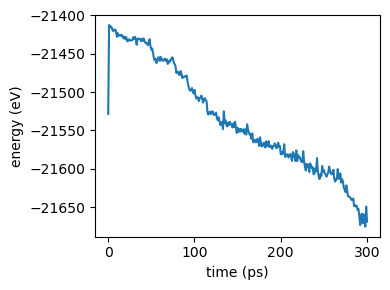

In [2]:
import matplotlib.pyplot as plt

energy = [atoms.get_total_energy() for atoms in traj]
time = np.arange(301)

fig, ax = plt.subplots(figsize = [4,3])
ax.plot(time, energy)
ax.set_ylabel('energy (eV)')
ax.set_xlabel('time (ps)')
fig.tight_layout()
#fig.savefig('0.500H.png', dpi=300)

In [21]:
traj[125].get_positions()

array([[-0.07912497,  5.21795988,  5.73690251],
       [ 2.61471152,  2.5808311 ,  5.56758622],
       [ 2.79830001,  3.15843771,  1.75135728],
       ...,
       [11.97641979, 19.82117736, 16.86129521],
       [24.43470391, 18.91163833, 23.93420817],
       [12.72905899, 25.81947275, 20.03546435]])

In [22]:
traj[126].get_positions()

array([[-0.13972617,  5.16228187,  5.52257291],
       [ 2.68366446,  2.68423897,  5.54425071],
       [ 2.6955935 ,  2.96193592,  1.80005671],
       ...,
       [11.78552027, 19.99093599, 16.9891491 ],
       [24.26304323, 18.88708304, 23.81262503],
       [12.6144628 , 25.85163379, 20.22964258]])

In [68]:
d = traj[13].get_positions() - traj[0].get_positions(); d
#d = traj[126].get_positions() - traj[0].get_positions(); d

array([[ 0.22790094, -0.03840174,  0.01963485],
       [-0.00244723,  0.1224804 ,  0.05847658],
       [ 0.07777134, -0.07012828,  0.11327577],
       ...,
       [ 0.08945735,  0.26426779, -0.15714898],
       [-0.1329625 , -0.09288332,  0.08320446],
       [ 0.01064371,  0.15816481,  0.14096916]])

In [69]:
np.sort(d,axis=0)

array([[-56.94454456, -44.10186224,  -1.61839684],
       [ -1.84362583,  -1.02939313,  -1.43274649],
       [ -1.63850009,  -0.97147094,  -1.26935612],
       ...,
       [  1.32955089,   1.29598152,   1.5615549 ],
       [  1.59332647,   1.49167951,   3.6664316 ],
       [  1.85953775,   1.9451281 ,  29.33288128]])

In [71]:
np.where(d==np.min(d[:,0]))

(array([776]), array([0]))

In [72]:
np.where(d==np.max(d[:,2]))

(array([776]), array([2]))

In [53]:
traj[0].cell

Cell([31.74247183237098, 33.374181725824705, 30.323236622082415])

In [54]:
traj[0][2232]

Atom('H', [7.609788931611967, 21.483129363549278, 12.120852788045708], momentum=[0.6505063460461632, 0.16548424176473428, 0.08498999304585225], mass=2.014, magmom=0.0, index=2232)

In [45]:
traj[126].get_positions()[2232]

array([50.21765303, 27.25966969, 82.48103471])

In [46]:
traj[125].get_positions()[2232]

array([ 8.80259847, 21.86596108, 11.48496087])

In [55]:
traj[126].get_positions()[2232]-traj[125].get_positions()[2232]

array([41.41505455,  5.39370861, 70.99607384])

In [56]:
traj[0].cell

Cell([31.74247183237098, 33.374181725824705, 30.323236622082415])

In [59]:
np.where(d==np.max(d[:,0]))

(array([2232]), array([0]))

In [60]:
np.where(d==np.max(d[:,1]))

(array([2232]), array([1]))

In [41]:
np.where(d==np.max(d[:,2]))

(array([2232]), array([2]))

In [3]:
from nglview.contrib.movie import MovieMaker
movie = MovieMaker(view, 
                   output='E6.0_HNi.gif', 
                   in_memory=True,
                   fps=60)
movie.make()

IntProgress(value=0, description='Rendering ...', max=171)

In [15]:
traj[0].get_chemical_formula()

'H576Nd1152Ni1152O3456'

In [4]:
def gau(x, mu, sig):
    return 1/sig/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/(2*sig**2))

x = np.linspace(0,traj[0].cell[0,0],10000)
#H_grad = np.zeros(x.size)

def calc_H_grad(x,timestep):
    y = np.zeros(x.size)
    for mu in H_pos[timestep,:,0]:
        y+=gau(x,mu,3)
    return y

def calc_H_grad2(timestep):
    y = np.zeros(x.size)
    for mu in H_pos[timestep,:,0]:
        y+=gau(x,mu,3)
    return np.expand_dims(y, axis=0)

from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    try:
         plt.colormaps.register(cmap=newcmap)
         return True
    except ValueError:
         pass
    return False

    return newcmap

# orig_cmap = matplotlib.cm.RdBu
# shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.35, name='shifted_RdBu35')

# orig_cmap = matplotlib.cm.hot
# shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted_hot25')            


# orig_cmap = matplotlib.cm.seismic
# shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted_seismic25')            



orig_cmap = matplotlib.cm.bwr
#shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted_seismic25')            
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.25, name='shifted_bwr25')            

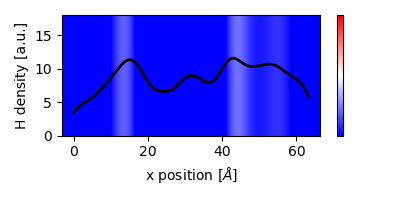

In [5]:
%matplotlib widget
%matplotlib ipympl
# Define initial parameters
init_timestep = 0
H_pos = np.array([atoms[[atom.index for atom in atoms if atom.symbol=='H']].get_positions() for atoms in traj])

# Create the figure and the line that we will manipulate
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=[4,2])
controls = iplt.plot(x,calc_H_grad, 
                     timestep = np.arange(0,len(traj)),
                     color='k',
                     play_buttons = True,
#                               #display = False,
                     lw=2)

ax.set_ylabel(r'H density [a.u.]')
ax.set_xlabel(r'x position [$\AA{}$]')
ax.set_ylim([0,18])

extent = ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]
iplt.imshow(calc_H_grad2, 
            timestep = np.arange(0,len(traj)), 
            vmin = 10,
            vmax = 17,
            controls=controls, 
            interpolation=None, 
            aspect='auto',
            #cmap=shifted_cmap,
            cmap='bwr',
            extent=extent) #plot imshow
cbar = plt.colorbar()
cbar.set_ticks([])

fig.tight_layout()


In [6]:
anim = controls.save_animation("plot-3.gif", fig, "timestep", interval=1, dpi=400)

MovieWriter ffmpeg unavailable; using Pillow instead.


In [6]:
x = np.linspace(0, np.pi,100)
tau = np.linspace(1,10, 100)
beta = np.linspace(1,10)
def f(x, tau, beta):
    return np.sin(x*tau)*x**beta
fig, ax, sliders = interactive_plot(f, x=x, tau = tau, beta = beta)

TypeError: 'int' object is not iterable